<a href="https://colab.research.google.com/github/Felipe0023/BigDataProject/blob/main/02colabInsightAbandonoEmpleado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
URL = "https://raw.githubusercontent.com/Felipe0023/BigDataProject/main/01DataBricksAbandonoEmpleadoClean.csv"
df = pd.read_csv(URL)
display(df)

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,1,0.38,0.53,2,157,3,0,1,0,sales,medium
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium
2,3,0.11,0.88,7,272,4,0,1,0,sales,medium
3,4,0.72,0.87,5,223,5,0,1,0,sales,medium
4,5,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,1,0,support,low
14995,14996,0.37,0.48,2,160,3,0,1,0,support,low
14996,14997,0.37,0.53,2,143,3,0,1,0,support,low
14997,14998,0.11,0.96,6,280,4,0,1,0,support,low


#BUSINESS ANALYTICS
#Cuantificacion del problema: Cual es la tasa de abandono?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [28]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [29]:
df.left.value_counts()*100/df.shape[0] # en porcentaje

0    76.191746
1    23.808254
Name: left, dtype: float64

# Hay un perfil tipo de empleado que deja la empresa?

In [30]:
#Department
mostrar = df.groupby("Department").left.count().sort_values(ascending=False)
mostrar

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: left, dtype: int64

Department
hr             29.093369
accounting     26.597132
technical      25.625000
support        24.899058
sales          24.492754
marketing      23.659674
IT             22.249389
product_mng    21.951220
RandD          15.374841
management     14.444444
Name: left, dtype: float64

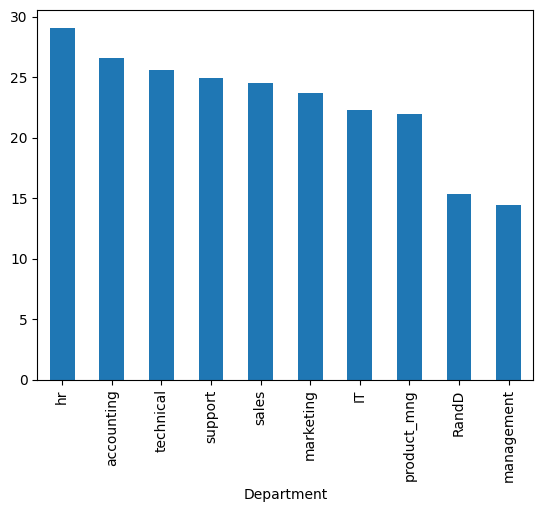

In [31]:
mostrar = df.groupby("Department").left.mean().sort_values(ascending=False)*100
mostrar.plot.bar()
mostrar

salary
low       29.669128
medium    20.455955
high       6.628941
Name: left, dtype: float64

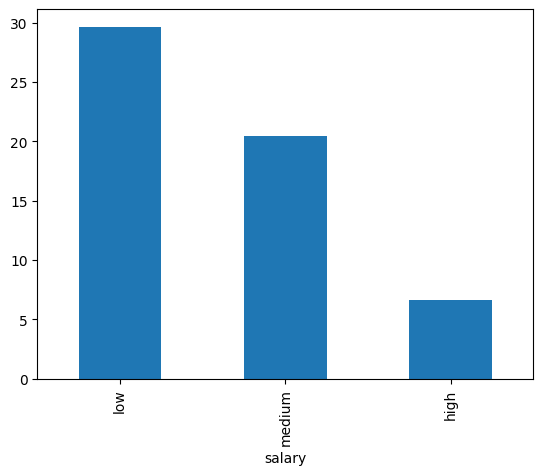

In [32]:
#salary
mostrar = df.groupby("salary").left.mean().sort_values(ascending=False)*100
mostrar.plot.bar()
mostrar

left
1    20741.921031
0    19906.020301
Name: average_montly_hours, dtype: float64

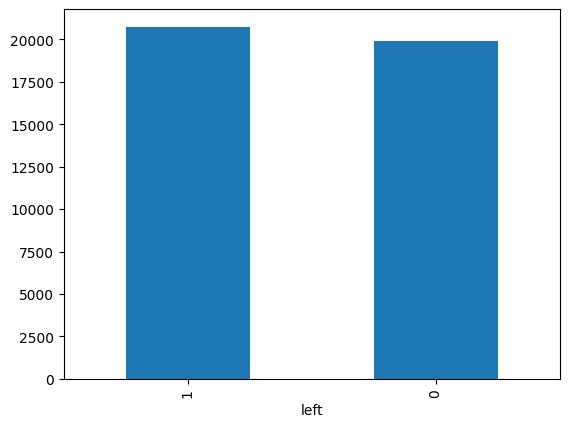

In [33]:
#average_montly_hours
mostrar = df.groupby("left").average_montly_hours.mean().sort_values(ascending=False)*100
mostrar.plot.bar()
mostrar

left
0    66.680959
1    44.009801
Name: satisfaction_level, dtype: float64

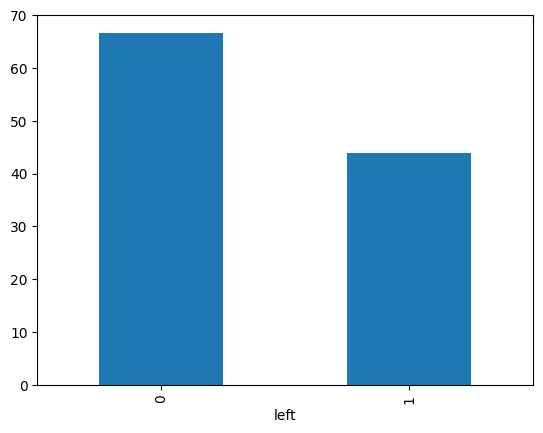

In [34]:
#satisfaction_level
mostrar = df.groupby("left").satisfaction_level.mean().sort_values(ascending=False)*100
mostrar.plot.bar()
mostrar

left
1    71.811257
0    71.547340
Name: last_evaluation, dtype: float64

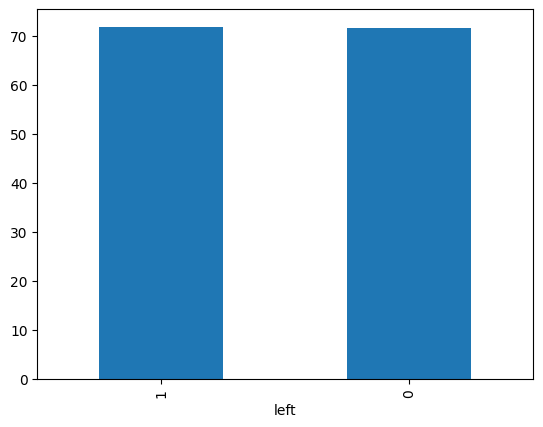

In [35]:
#last_evaluation
mostrar = df.groupby("left").last_evaluation.mean().sort_values(ascending=False)*100
mostrar.plot.bar()
mostrar

# Conclusiones:
# El perfil medio del empleado que deja la empresa es:
# Trabaja en Hr
# Bajo salario
# Muchas horas de trabajo
# Bajo nivel de satisfaccion
# Por evaluacion aunque no determinante



# ¿Cual es el impacto económico de este problema?
# Según el estudio "Cost of Turnover" del Center for American Progress:
# El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario
# El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario
# El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario
# El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [36]:
df.salary.value_counts()

low       7314
medium    6448
high      1237
Name: salary, dtype: int64

In [37]:
df['salary'] = df.salary.map({'low':30000, 'medium':50000, 'high':75000 })

In [48]:
df.salary.value_counts()

30000    7314
50000    6448
75000    1237
Name: salary, dtype: int64

In [56]:
pago = 30000*7314 + 50000*6448 + 75000*1237
pago

634595000

In [58]:
impacto = 30000*7314*0.161 + 50000*6448*0.197 + 75000*1237*0.204
impacto

117765520.0

In [61]:
xporcentaje = impacto*100/pago
xporcentaje

18.55758712249545